In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [70]:
# ! pip install plotnine

In [71]:
# !/Users/kcondeixa/repositories/my_projects/candy_chush/env_candycrush/bin/python3 -m pip install --upgrade pip


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from matplotlib.ticker import PercentFormatter

from plotnine import *
# import ggplot, aes, geom_line, scale_x_continuous, scale_y_continuous, ylab, ggtitle, element_text
# from plotnine.scales import percent

In [119]:
df = pd.read_csv('data/candy_crush.csv')
df.head()

,player_id,dt,level,num_attempts,num_success
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0


In [120]:
df.shape

(16865, 5)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player_id     16865 non-null  object
 1   dt            16865 non-null  object
 2   level         16865 non-null  int64 
 3   num_attempts  16865 non-null  int64 
 4   num_success   16865 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 658.9+ KB


## Candy Crush Saga
- The data set
- Checking the data set
- Computing level difficulty
- Plotting difficulty profile
- Spotting hard levels
- Computing uncertainty
- Showing uncertainty
- A final metric
- Should our level designer worry?

## Metrics for free to play Games  

- Retention rate: The percentage of players who continue to play the game over a period of time, such as one week, one month, or three months.

- **Daily active users (DAU): The number of unique users who play the game each day. This metric measures the number of unique users who engage with a game on a daily basis. It is used to track the popularity of a game and to monitor changes in user engagement over time.**

- Average revenue per user (ARPU): The total revenue generated by the game divided by the number of active users. This metric can help to measure the effectiveness of monetization strategies, such as in-app purchases or advertising.

- **Level completion rate: The percentage of players who successfully complete each level of the game. This metric can help to measure the difficulty of the game and identify levels that may need to be adjusted to improve the player experience.**

- Time spent in the game: The average amount of time that players spend in the game each day. This metric can help to measure engagement and identify features that are most popular among players.

- Churn rate: The percentage of players who stop playing the game over a period of time, such as one week or one month. This metric can help to identify areas where the game may be losing players and potential reasons for player attrition.

- Virality coefficient: The number of new users that are acquired through word-of-mouth or social sharing, divided by the total number of active users. This metric can help to measure the effectiveness of referral programs or social media marketing campaigns.


In [122]:
# my_list = df['level']

unique_values = df['level'].unique()
for value in unique_values:
    count = df[df['level'] == value].shape[0]
    print(f"{value}: {count}")

4: 707
8: 2010
12: 1133
11: 1017
15: 3373
9: 1242
10: 893
14: 854
5: 1231
3: 676
6: 674
13: 690
1: 678
2: 681
7: 1006


<AxesSubplot:>

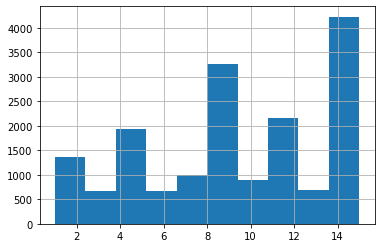

In [123]:
 df['level'].hist()

In [124]:
def computing_column(column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    std_dev = df[column].std()
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard deviation: {std_dev}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")

column = 'level'
computing_column(column)       

Mean: 9.287222057515566
Median: 9.0
Mode: 15
Standard deviation: 4.343476812177027
Minimum value: 1
Maximum value: 15


Text(0, 0.5, 'Level Values')

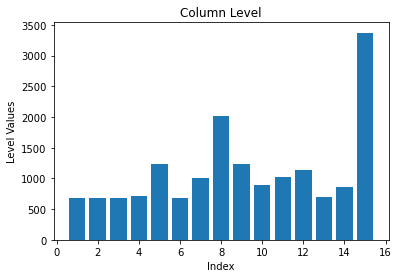

In [125]:
category_counts = df[column].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Column Level')
plt.xlabel('Index')
plt.ylabel('Level Values')

In [126]:
df['success_rate'] = df['num_success']/df['num_attempts']
# df['success_rate'].shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     16865 non-null  object 
 1   dt            16865 non-null  object 
 2   level         16865 non-null  int64  
 3   num_attempts  16865 non-null  int64  
 4   num_success   16865 non-null  int64  
 5   success_rate  16822 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 790.7+ KB


### What is the probably to a user win?

In [127]:
difficulty = df.groupby('level').agg({'num_attempts':'sum', 'num_success': 'sum'})
difficulty

,num_attempts,num_success
level,,
1,1322,818
2,1285,666
3,1546,662
4,1893,705
5,6937,634
6,1591,668
7,4526,614
8,15816,641
9,8241,670


In [128]:
difficulty['p_win'] = (difficulty['num_success']/difficulty['num_attempts'])

In [129]:
difficulty = difficulty.reset_index()

In [130]:
difficulty


,level,num_attempts,num_success,p_win
0,1,1322,818,0.618759
1,2,1285,666,0.518288
2,3,1546,662,0.428202
3,4,1893,705,0.372425
4,5,6937,634,0.091394
5,6,1591,668,0.419862
6,7,4526,614,0.135661
7,8,15816,641,0.040529
8,9,8241,670,0.081301
9,10,3282,617,0.187995


In [131]:
# Compute the standard error of p_win for each level
p_win = difficulty['p_win']
attempts = difficulty['num_attempts']
error = np.sqrt(p_win * (1 - p_win) / attempts)
difficulty['error'] = error
# Print the standard error Series
difficulty.head()

,level,num_attempts,num_success,p_win,error
0,1,1322,818,0.618759,0.013358
1,2,1285,666,0.518288,0.013939
2,3,1546,662,0.428202,0.012585
3,4,1893,705,0.372425,0.011112
4,5,6937,634,0.091394,0.003460


In [89]:
# !jupyter kernelspec list


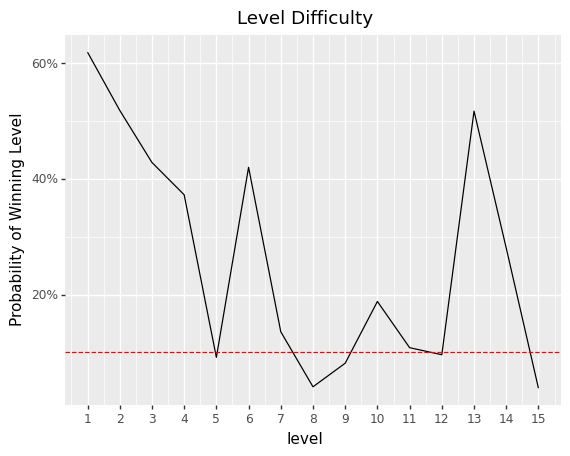

<ggplot: (8787133435880)>

In [132]:
from mizani.formatters import percent_format

ggplot(data=difficulty, mapping=aes(x='level', y='p_win')) + \
    geom_line() + \
    scale_x_continuous(breaks=list(range(1, 16))) + \
    scale_y_continuous(labels=percent_format(2)) + \
    ylab("Probability of Winning Level") + \
    ggtitle("Difficulty Level") + \
    theme(plot_title=element_text(hjust = 0.5)) + \
    geom_hline(yintercept=0.1, linetype='dashed', color='red')

In [105]:
# compute the probability of completing the episode without losing
p = np.prod(difficulty['p_win'])

# print out the result
print(f"The probability of completing the episode without losing a single time is {p:.12e}")

The probability of completing the episode without losing a single time is 9.447140934486e-12


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     16865 non-null  object 
 1   dt            16865 non-null  object 
 2   level         16865 non-null  int64  
 3   num_attempts  16865 non-null  int64  
 4   num_success   16865 non-null  int64  
 5   success_rate  16822 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 790.7+ KB


In [59]:
df.head()

,player_id,dt,level,num_attempts,num_success,success_rate
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1,0.333333
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1,0.250000
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0,0.000000
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1,1.000000
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0,0.000000


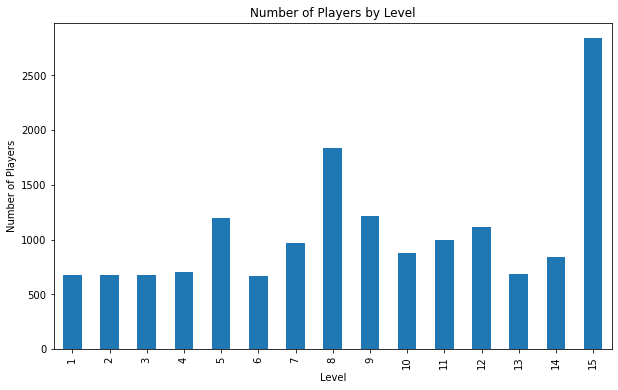

In [106]:
grouped = df.groupby('level')['player_id'].nunique()
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Level')
plt.ylabel('Number of Players')
plt.title('Number of Players by Level')
plt.show()

In [ ]:

# # create a 3D scatter plot of difficulty, time, and success rate
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['level'], df['num_attempts'], df['num_success'])

# # add labels to the plot
# ax.set_title('Difficulty Profile')
# ax.set_xlabel('Level')
# ax.set_ylabel('num_attempt')
# ax.set_zlabel('success_rate')

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols 

In [ ]:
data = num_cols 

fig, ax = plt.subplots()
ax.boxplot(df[num_cols])
ax.set_xticklabels(num_cols)
ax.set_title('Boxplots of Numerical Columns')
plt.show()


The number of attempts is many outliers. The number od success has too.

## The top hardest and easiest levels

In [ ]:
# sort the DataFrame by success rate in descending order
df_sorted = df.sort_values(by='success_rate', ascending=False)

# plot the data using a bar chart
plt.bar(df_sorted['level'], df_sorted['success_rate'])
plt.xticks(df_sorted['level'])
plt.ylabel('Success Rate')
plt.title('Difficulty Profile')
plt.show()

The most dificult level is the 8th, then 1st,4th and 6th. The easiest level is the 10th, followed by the 9th.
The difficulty of the 8th level seems to be an obstacle that makes players leave the game, but it could be an strategy. It's hard to say without having more context.

## Level completion rate

Number of players by level
> Checking if a hight difficult in level 8 results in user dropout.

In [ ]:
grouped = df.groupby('level')['player_id'].nunique()
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Level')
plt.ylabel('Number of Players')
plt.title('Number of Players by Level')
plt.show()

In [ ]:
# group the data by player_id and get the maximum level reached by each player
max_level_df = df.groupby('player_id')['level'].max()
max_level_df

# # create a new column indicating if the player stopped at level 8 or continued playing
# df['stopped_at_level_8'] = max_level_df.apply(lambda x: x == 8)

# # print the number of players who stopped at level 8 and who continued playing
# print(df)


# count number of players with max level <= 8
num_players_level8_or_less = (max_level_df <= 8).sum()

# count number of players with max level > 8
num_players_above_level8 = (max_level_df > 8).sum()

print("Number of players with max level 8 or less:", num_players_level8_or_less)
print("Number of players with max level above 8:", num_players_above_level8)


The number of users at levels higher than 8th is greater than up to this level. But, it doesn't mean that users are not droping out.

In [ ]:
grouped = df.groupby('level')['player_id'].nunique()
grouped.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Level')
plt.ylabel('Number of Players')
plt.title('Number of Players by Level')
plt.show()

Most of the players is in the last level (15) and many of them are in the level 8, the levels seem to be unbalances. However, I should have more information to understand the context to guess if there is some problem in these levels.

In [ ]:
# Avg levels played by user

# # Group the data by player_id and calculate the mean of the "level" column
# counts = df.groupby('level')['player_id'].count()

# # pct = counts/counts.sum() * 100

# # Create a bar graph to visualize the percentages
# plt.bar(counts.index, counts.values)
# plt.title('Number of Players per Level')
# plt.xlabel('Level')
# plt.ylabel('Players')
# plt.show()

In [ ]:
df.info()

In [ ]:
# Extract num_attempts and num_success columns
num_attempts = df['num_attempts']
num_success = df['num_success']

# Create scatterplot
plt.scatter(num_attempts, num_success)
plt.title('Attempts vs Success')
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Successes')
plt.show()

## Success rate by day 

In [ ]:
# convert the 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# calculate the success rate for each level and each date
success_rates = df.groupby(['level', 'dt'])['num_success'].sum() / df.groupby(['level', 'dt'])['num_attempts'].sum()

# plot the success rate for each level over time
fig, ax = plt.subplots(figsize=(10, 6))

for level in success_rates.index.levels[0]:
    ax.plot(success_rates.loc[level], label=f'Level {level}')

ax.set_xlabel('Date')
ax.set_ylabel('Success Rate')
ax.set_title('Success Rate by Level over Time')
ax.legend()

plt.show()

The success rate is more constant in the last levels.
The level 10 was shown to have a peak on 2014-01-02, it could be investigating if having more information. The success rate in level 6 is pretty inconstant.

## Min and max date

In [ ]:
min_date = df.dt.min()
max_date = df.dt.max()

print('Mim date: ', min_date)
print('Max date: ', max_date)

The period of one week is to short to draw solid conclusions.

## Measuring uncertanties 
 Using 95% of confidence interval for the mean of a population.

In [ ]:
grouped = df.groupby('level')['num_attempts']

# compute the mean and standard deviation of each group
means = grouped.mean()
stds = grouped.std()

# compute the sample size and degrees of freedom for each group
n = grouped.size()
defree = n - 1

# compute the standard error of the mean for each group
se = stds / np.sqrt(n)

# compute the t-value for a 95% confidence interval with the given degrees of freedom
t_value = t.ppf(0.975, defree)

# compute the lower and upper bounds of the confidence interval for each group
lower = means - t_value * se
upper = means + t_value * se

# create a new DataFrame with the confidence intervals
ci_df = pd.DataFrame({'mean': means, 'lower': lower, 'upper': upper})

print(ci_df)

In [ ]:
# plot the mean number of attempts for each level with error bars showing the confidence intervals
plt.errorbar(ci_df.index, ci_df['mean'], yerr=(ci_df['mean'] - ci_df['lower'], ci_df['upper'] - ci_df['mean']), fmt='o')

# add labels and titles
plt.xlabel('Level')
plt.ylabel('Mean Number of Attempts')
plt.title('Mean Number of Attempts by Level (95% Confidence Interval)')

# show the plot
plt.show()

The level 11 was shows with higher uncertainty with a more spread out and less realiable values. On the other hand, the levels 2,3 and 13 were shown with lower uncertanties.

In [ ]:
success_rates

In [ ]:
# df
# check for null values and count them
print(df.isnull().sum())

In [ ]:
# drop rows with nulls
df_clean = df.dropna(subset=['success_rate'])
df_clean.info()

## Daily active users

In [ ]:
users_per_day = df.groupby('dt')['player_id'].nunique()
print(users_per_day)

In [ ]:
# df['day_type'] = df['dt'].apply(lambda x: 'weekend' if x.weekday() in [5, 6] else 'workday')

# create a new DataFrame with the number of users per day
users_per_day_df = df.groupby('dt')['player_id'].nunique().reset_index()

# add a new column to indicate whether the day is a weekend or weekday
users_per_day_df['day_type'] = users_per_day_df['dt'].dt.day_name()
# users_per_day_df['day_type_color'] = users_per_day_df['day_type'].apply(lambda x: 'blue' if x in ['Saturday', 'Sunday'] else 'red')
# users_per_day_df
# create the plot
# plt.plot(users_per_day_df['dt'], users_per_day_df['player_id'], color=users_per_day_df['day_type_color'])
# plt.xlabel('Date')
# plt.ylabel('Number of users')
# plt.title('Number of users per day')
# plt.show()

# rename column 
users_per_day_df = users_per_day_df.rename(columns={'player_id': 'n_players'})
# users_per_day_df

# users_per_day_df['day_type_color'] = users_per_day_df.day_type.map({'Monday': 'blue','Tuesday': 'blue', 'Wednesday': 'blue', 'Thursday': 'blue', 'Friday': 'blue', 'Saturday': 'red', 'Sunday': 'red'})

users_per_day_df
# plt.scatter(x=users_per_day_df.index, y=n_players.values, c=day_type_color.values)

Wednesday is the day with less active players.

In [ ]:
sum_weekends = users_per_day_df.loc[(users_per_day_df['day_type'] == 'Saturday') | (users_per_day_df['day_type'] == 'Sunday')  , 'n_players'].sum()
sum_workdays =  users_per_day_df['n_players'] - sum_weekends

avg_weekends = sum_weekends/2
avg_workdays = sum_weekends/5

pct_weekends_over_weekdays = avg_weekends/avg_workdays

print('The avg of players in weekends is ', avg_weekends)
print('The avg of players in workdays is ', avg_workdays)
print('The pct of players in weekends over workdays is ', pct_weekends_over_weekdays)
# print(sum_weekends)
# print(sum_workdays)
    